In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
gdf_comunas = gpd.read_file('comunas.shp') ##geodf
df_ecobici = pd.read_csv('nuevas-estaciones-bicicletas-publicas.csv') ##df

In [3]:
gdf_comunas.head(10)

,id,objeto,comuna,barrios,perimetro,area,geometry
0,1,COMUNA,1,"Constitucion, Monserrat, Retiro, Puerto Madero...",36011.96,17784744.41,"MULTIPOLYGON (((-58.36855 -34.57365, -58.36852..."
1,2,COMUNA,2,Recoleta,21450.47,6317725.62,"POLYGON ((-58.38001 -34.57002, -58.38003 -34.5..."
2,3,COMUNA,3,"San Cristobal, Balvanera",10486.26,6385991.48,"POLYGON ((-58.41192 -34.598, -58.4103 -34.5980..."
3,4,COMUNA,4,"Barracas, La Boca, Parque Patricios, Nueva Pom...",35474.12,21688665.28,"POLYGON ((-58.35521 -34.61943, -58.35514 -34.6..."
4,5,COMUNA,5,"Almagro, Boedo",12323.43,6660603.14,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."
5,6,COMUNA,6,Caballito,10990.96,6851028.91,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
6,7,COMUNA,7,"Flores, Parque Chacabuco",17972.26,12422900.83,"POLYGON ((-58.452 -34.62974, -58.45158 -34.630..."
7,8,COMUNA,8,"Villa Lugano, Villa Riachuelo, Villa Soldati",20943.00,22218817.04,"POLYGON ((-58.44913 -34.65116, -58.44883 -34.6..."
8,9,COMUNA,9,"Parque Avellaneda, Mataderos, Liniers",21411.74,16505305.78,"POLYGON ((-58.51925 -34.63301, -58.51908 -34.6..."
9,10,COMUNA,10,"Floresta, Monte Castro, Velez Sarsfield, Versa...",18332.04,12656556.95,"POLYGON ((-58.48834 -34.62016, -58.4882 -34.62..."


In [16]:
df_ecobici.head(10)

,id,numero_de_estacion,nombre,direccion,barrio,comuna,emplazamiento,latitud,longitud
0,240,239,VIDAL,Av. Cramer 2900,NaN,NaN,NaN,-34.558137,-58.467259
1,95,95,ESMERALDA,Av. Antártida Argentina & Cecilia Grierson,NaN,NaN,NaN,-34.595653,-58.369162
2,30,30,PEÑA,Peña & Azcuenaga,NaN,NaN,NaN,-34.590821,-58.397370
3,121,121,YATAY,925 Yatay& Humahuaca,NaN,NaN,NaN,-34.601173,-58.428509
4,473,216,EMILIO LAMARCA,EMILIO LAMARCA 2066,NaN,NaN,NaN,-34.613403,-58.493358
5,166,166,CEMENTERIO DE RECOLETA,Vicente López 2100,NaN,NaN,NaN,-34.588347,-58.394148
6,477,311,SEC. DE INNOVACION Y TRANSFORMACIÓN,Av. Caseros 2309,NaN,NaN,NaN,-34.635005,-58.395054
7,372,322,MARTÍ Y DIRECTORIO,"404 Marti, Jose",NaN,NaN,NaN,-34.636406,-58.470136
8,568,342,HONDURAS,Honduras 5190,NaN,NaN,NaN,-34.587550,-58.431960
9,368,378,AGRONOMIA,Enzo Brdabehere 2897,NaN,NaN,NaN,-34.599938,-58.481323


In [6]:
from shapely.geometry import Point


# Se crea la geometría a partir de las columnas 'longtiud' y 'latitud'
# (Siempre me aseguro de que el orden sea LONGITUD primero, LUEGO LATITUD)
geometria = [Point(xy) for xy in zip(df_ecobici['longitud'], df_ecobici['latitud'])]

# 2. Crea el geodataframe
gdf_ecobici = gpd.GeoDataFrame(df_ecobici, geometry=geometria)

In [7]:
gdf_ecobici.set_crs(epsg=4326, inplace=True)

gdf_comunas_web = gdf_comunas.to_crs(epsg=3857)
gdf_ecobici_web = gdf_ecobici.to_crs(epsg=3857)

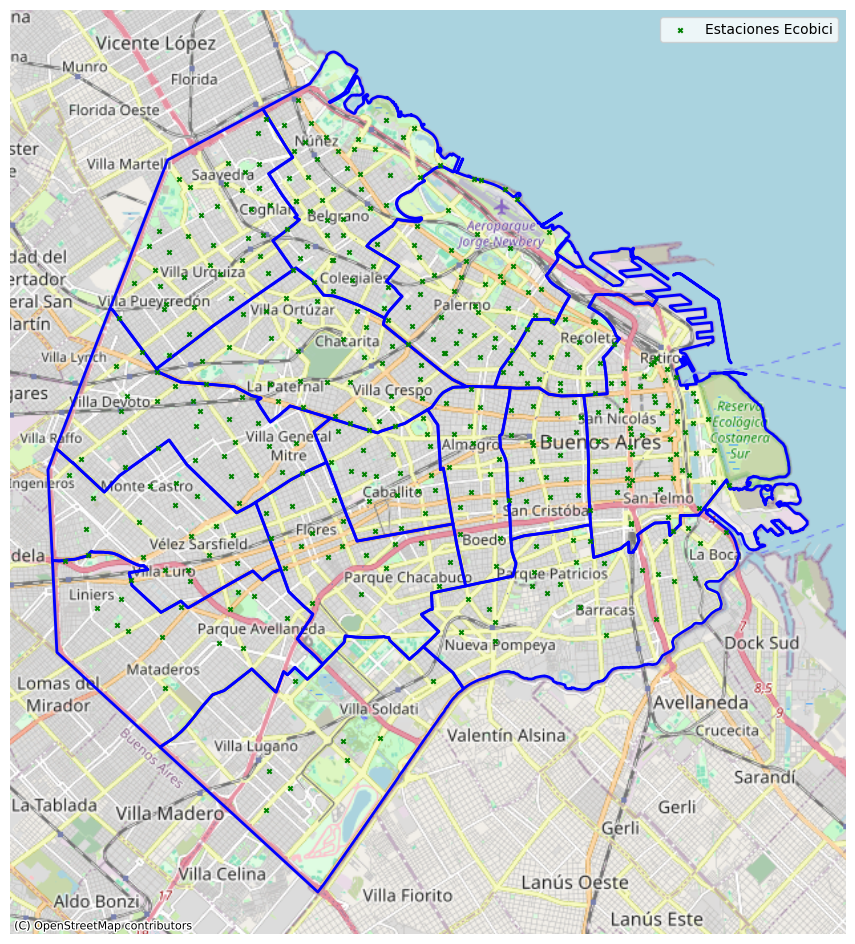

In [8]:
import matplotlib.pyplot as plt
import contextily as cx

fig, ax = plt.subplots(figsize=(12, 12))

# Dibujar los polígonos (comunas)
gdf_comunas_web.plot(ax=ax, 
                     facecolor='none',  # Sin relleno
                     edgecolor='blue',  # Bordes azules
                     linewidth=2)

# Dibujar los puntos (estaciones)
gdf_ecobici_web.plot(ax=ax, 
                     color='green', 
                     markersize=10,
                     marker="x",
                     label='Estaciones Ecobici')

# Agrego el mapa de fondo
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off() # 5. Limpiar los ejes
plt.legend()
plt.show()